# 健康と幸福度の関係
氏名：仲町友里<br>
学籍番号：1254810546<br><br>
テーマを選んだ理由は、幸福度に健康が関係しているのか気になったからです。

In [1]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
import pandas as pd

file_path = 'world_happiness_report.csv'
df = pd.read_csv(file_path)

mapping = {
    'Country': '国名',
    'Region': '地域',
    'Happiness Rank': '幸福度順位',
    'Happiness Score': '幸福度スコア',
    'Standard Error': '標準誤差',
    'Economy (GDP per Capita)': '経済（1人当たりGDP）',
    'Family': '家族（社会的支援）',
    'Health (Life Expectancy)': '健康（平均寿命）',
    'Freedom': '自由',
    'Trust (Government Corruption)': '信頼（政府の汚職）',
    'Generosity': '寛容さ',
    'Dystopia Residual': 'ディストピア残差',
    'year': '年'
}

df.rename(columns=mapping, inplace=True)

output_file = 'world_happiness_report_jp.csv'
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"保存先: {output_file}")

保存先: world_happiness_report_jp.csv


In [19]:
# 全期間の地域ごとの幸福度平均を算出
df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64

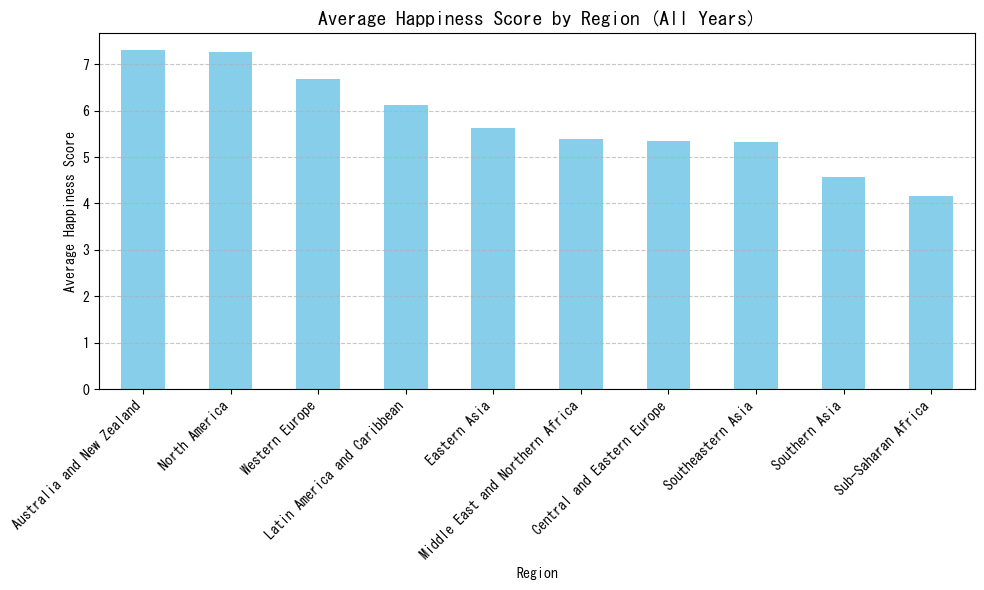

In [20]:
import matplotlib.pyplot as plt

# 1. データの集計（ご提示のコード）
region_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# 2. 棒グラフの作成
plt.figure(figsize=(10, 6))
region_happiness.plot(kind='bar', color='skyblue')

# 3. グラフの装飾
plt.title('Average Happiness Score by Region (All Years)', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right') # 地域名が長いので斜めにする
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # レイアウトを整える
plt.show()

In [9]:
# 地域ごとの健康寿命の平均値を算出
df.groupby('Region')['Health (Life Expectancy)'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          0.880522
Western Europe                     0.867451
North America                      0.843505
Eastern Asia                       0.842034
Central and Eastern Europe         0.675183
Middle East and Northern Africa    0.662170
Latin America and Caribbean        0.656305
Southeastern Asia                  0.619363
Southern Asia                      0.497250
Sub-Saharan Africa                 0.261646
Name: Health (Life Expectancy), dtype: float64

C:\Users\matin\AppData\Local\Temp\ipykernel_23904\2275885652.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_health.values, y=region_health.index, palette='coolwarm')


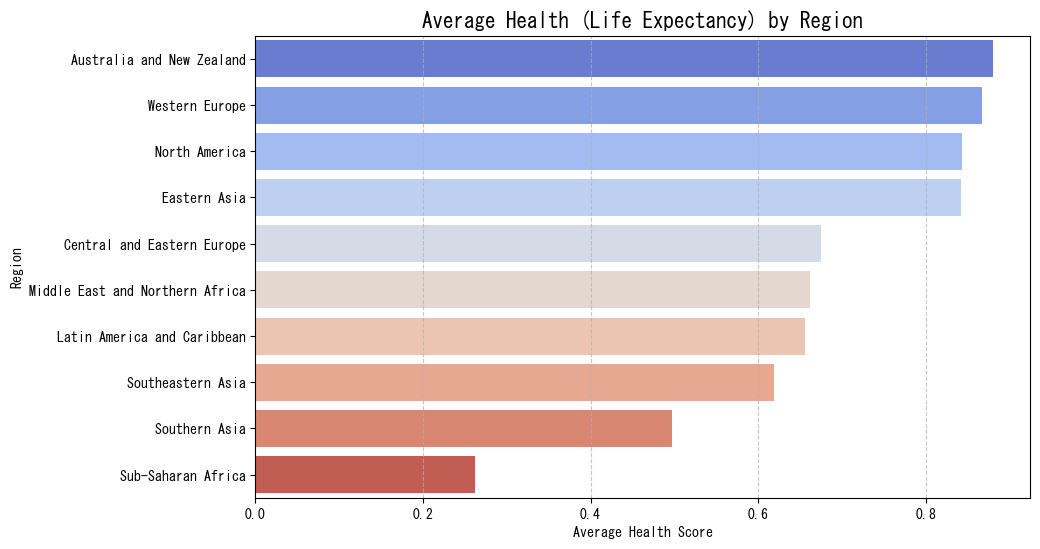

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 地域（Region）ごとの健康寿命の平均を計算
region_health = df.groupby('Region')['Health (Life Expectancy)'].mean().sort_values(ascending=False)

# 2. グラフの作成
plt.figure(figsize=(10, 6))
sns.barplot(x=region_health.values, y=region_health.index, palette='coolwarm')

# 3. グラフの装飾
plt.title('Average Health (Life Expectancy) by Region', fontsize=15)
plt.xlabel('Average Health Score')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [10]:
# 健康スコアと幸福度スコアの相関計数を計算
correlation = df['Health (Life Expectancy)'].corr(df['Happiness Score'])
print(f"健康と幸福度の相関計数: {correlation:.2f}")

健康と幸福度の相関計数: 0.73


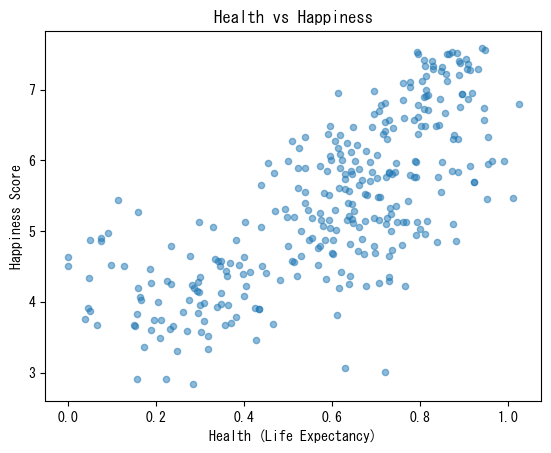

In [11]:
import matplotlib.pyplot as plt

# 散布図の作成
df.plot(kind='scatter', x='Health (Life Expectancy)', y='Happiness Score', alpha=0.5)
plt.title('Health vs Happiness')
plt.show()

### 結論
分析結果から、幸福度の高い地域として上位の方にランクインしている地域は、健康寿命の平均でも高い位置についていると分かりました。また、上位の地域は西欧が多いと分かりました。<br>
相関係数と散布図から分かる通り、高いとまでは言えないが、健康と幸福度には正の相関関係があると分かりました。<br>
その理由は、自分が健康でないと、自分の好きなことや楽しいことが思うように出来ないからだと思うからです。<br>
このことから、健康であることは幸福度が高いことに関係があるといえます。